In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

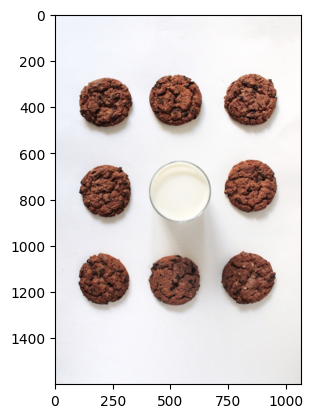

In [2]:
# https://stackoverflow.com/questions/72061208/how-to-detect-an-object-that-blends-with-the-background

image = cv.imread('images/cookies_milk.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_copy = image.copy()
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(image)

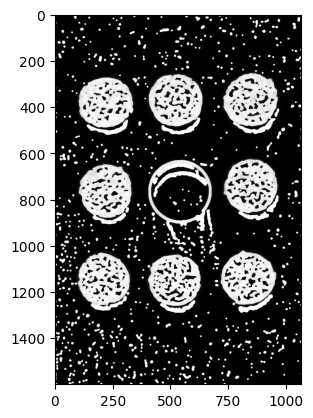

In [3]:
def difference_of_Gaussians(img, k1, s1, k2, s2):
    b1 = cv.GaussianBlur(img,(k1, k1), s1)
    b2 = cv.GaussianBlur(img,(k2, k2), s2)
    return b1 - b2

DoG_img = difference_of_Gaussians(gray, 7, 7, 17, 13)

DoG_img = cv.medianBlur(DoG_img, 5)

#ERODE
kernel = np.ones((5,5),np.uint8)
DoG_img = cv.erode(DoG_img, kernel, iterations = 1)

#DILATE
kernel = np.ones((5,5),np.uint8)
DoG_img = cv.dilate(DoG_img, kernel, iterations = 2)

DoG_img = cv.medianBlur(DoG_img, 9)

plt.imshow(DoG_img, cmap='gray')

Number of objects detected: 9


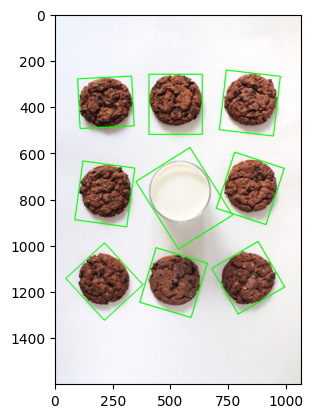

In [4]:
# Applying Otsu Threshold and finding contours
th = cv.threshold(DoG_img ,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
contours, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Create copy of original image

# for each contour above certain area and extent, draw minimum bounding box 
# 
object_count = 0 
for c in contours:
    area = cv.contourArea(c)
    if area > 1000:
        x,y,w,h = cv.boundingRect(c)
        extent = int(area)/(w*h)                
        if extent > 0.6:
            rect = cv.minAreaRect(c)
            box = cv.boxPoints(rect)
            box = np.int_(box)
            cv.drawContours(image_copy,[box],0,(0,255,0),4)
            object_count += 1

print(f"Number of objects detected: {object_count}")
plt.imshow(image_copy)